
<div align="center">
  <a href="https://www.w-hs.de/maschinenbau-master-boh/">
    <img src="https://www.w-hs.de/typo3conf/ext/whs/Resources/Public/Images/Pagelayout/w-hs_pagelogo.png" 
    alt="Images" width="500" height="200">
  </a>
</div>
<br>
<h1 align="center"> Sondergebiete der Simulation</h1>
<h3 align="center"> WS 21/22 </h3>
<br>

### 1. Kurze  Herleitung der Bewegungsgleichungen
### 2. Numerische Lösung der Differentialgleichungen
### 3. Lösungsfunktion interpolieren
### 4. Trainingspunkte extrahieren
### 5. PINN trainieren
### 6. Ergebnisse darstellen
<br>

### Credits:

* [benmoseley](https://github.com/benmoseley/harmonic-oscillator-pinn)

In [1]:
import sympy
from sympy import symbols, Function, diff, sin, cos, Matrix, Rational, Eq, solve, lambdify
import sympy.physics.mechanics as mech
mech.init_vprinting()

### Herleitung der Bewegungsgleichungen 

Beschreibung der Herleitung:
[Inverted Pendulum Legrange](https://github.com/lennart2810/InvertedPendulumSDS/blob/master/MKS/Inverted%20Pendulum%20Legrange.ipynb) 

In [2]:
# symbolischen Variablen anlegen
t, l, M, m, g = symbols('t l M m g')

# Zwangsbedingung
y = 0

# generalisierte Koordinaten und deren Ableitungen:
x = Function('x')(t)
x_d = diff(x,t)
x_dd = diff(x_d,t)

theta = Function('theta')(t)
theta_d = diff(theta,t)
theta_dd = diff(theta,t,t)

# Kinematik
x2, y2 = x - l * sin(theta), y + l * cos(theta)
x2_d, y2_d = x2.diff(t), y2.diff(t)

# Legrange-Funktion
T = Rational(1,2) * M * (x_d)**2 + Rational(1,2) * m * (x2_d**2 + y2_d**2)
V = M * g * y + m * g * y2 
L = T - V

# Euler-Legrange
LE_x = diff(diff(L, x_d), t) - diff(L, x)
LE_theta = diff(diff(L, theta_d), t) - diff(L, theta)

### Lösung des Bewegungsgleichungen nach $\ddot{x}$ und $\ddot{\theta}$ mit sympy's `solve`.

In [3]:
solutions = solve([LE_x, LE_theta], (x_dd, theta_dd), simplify=True)

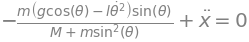

In [4]:
display(Eq(x_dd-solutions[x_dd], 0))

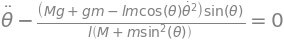

In [5]:
display(Eq(theta_dd - solutions[theta_dd], 0))

In [6]:
dxdt = lambdify(x_d, x_d)
dvdt = lambdify((t,g,M,m,l,theta,theta_d), solutions[x_dd])

dthetadt = lambdify(theta_d, theta_d)
domegadt = lambdify((t,g,M,m,l,theta,theta_d), solutions[theta_dd])

def dSdt(S, t, g, M, m, l):
    x, v, theta, omega = S
    return [
        dxdt(v),
        dvdt(t,g,M,m,l,theta, omega),
        dthetadt(omega),
        domegadt(t,g,M,m,l,theta,omega)
    ]

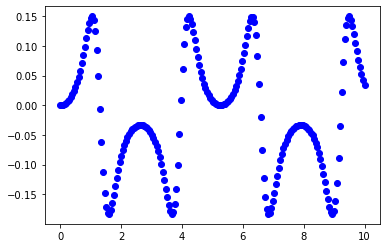

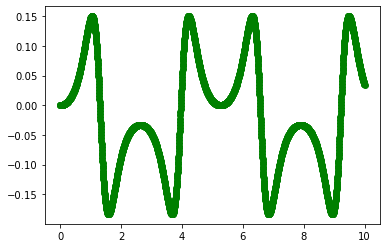

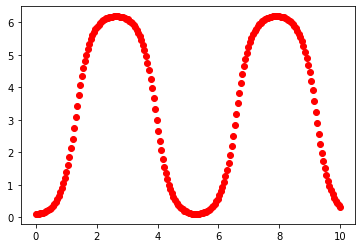

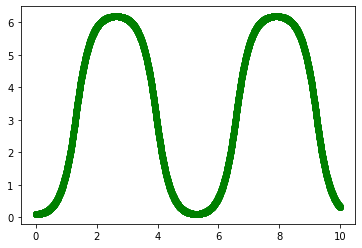

In [7]:
from numpy import linspace
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import interpolate

t1 = 10                          # s 
samples = 200                    # n 
t = linspace(0, t1, samples)     # s

g = 9.81                         # m/s^2
M = 5                            # kg
m = 1                            # kg
l = 1                            # m
F = 0                            # N

S0 = [0, 0, 0.1, 0]              # m, m/s, rad, rad/s

ans = odeint(dSdt, y0=S0, t=t, args=(g, M, m, l))
x = ans.T[0]
theta = ans.T[2]

t_new = linspace(0, t1, samples+2000)    

x_f = interpolate.interp1d(t, x, 'cubic')
theta_f = interpolate.interp1d(t, theta, 'cubic')

plt.plot(t, x, 'bo')
plt.show()
plt.plot(t_new, x_f(t_new), 'go')
plt.show()

plt.plot(t, theta, 'ro')
plt.show()
plt.plot(t_new, theta_f(t_new), 'go')
plt.show()

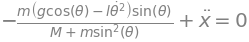

In [8]:
display(Eq(x_dd-solutions[x_dd], 0))

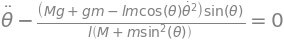

In [9]:
display(Eq(theta_dd - solutions[theta_dd], 0))

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import tensorflow as tf
from tensorflow import sin, cos
import deepxde as dde
import numpy as np
%matplotlib inline

'''
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    return -dy_xx - dy_yy - 1
    
    r1 = dx_tt - (m * (g * theta - l * dtheta_t**2 * theta) / (M + m * theta**2)) 
    r2 = dtheta_tt - ((M*g+m*g-l*m*theta*dtheta_t**2) * theta / l*(M+m*theta**2)) '''
    
"""def pde(x, y):
    dy_xx = dde.grad.hessian(y, x, i=0, j=0)
    dy_yy = dde.grad.hessian(y, x, i=1, j=1)
    return -dy_xx - dy_yy - 1"""



Compiling model...
Building feed-forward neural network...
'build' took 0.044478 s



/Users/lennartfuhrig/opt/anaconda3/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+37=37. 
  warnings.warn("The balance properties of Sobol' points require "


'compile' took 0.654127 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [2.52e-02, 7.44e+03, 4.25e-02, 1.62e-01]    [2.51e-02, 7.43e+03, 4.25e-02, 1.62e-01]    [1.06e+00]    
1000      [4.65e-09, 8.68e-04, 4.62e-15, 1.00e-02]    [4.56e-09, 8.00e-04, 4.62e-15, 1.00e-02]    [1.00e+00]    
2000      [5.81e-10, 8.62e-05, 1.49e-15, 1.00e-02]    [5.65e-10, 8.19e-05, 1.49e-15, 1.00e-02]    [1.00e+00]    
3000      [3.41e-10, 2.15e-05, 2.17e-19, 9.99e-03]    [2.92e-10, 1.82e-05, 2.17e-19, 9.99e-03]    [1.00e+00]    
4000      [3.30e-10, 2.00e-05, 9.16e-16, 9.99e-03]    [2.79e-10, 1.63e-05, 9.16e-16, 9.99e-03]    [1.00e+00]    
5000      [1.23e-09, 9.99e-05, 1.34e-13, 9.98e-03]    [1.02e-09, 7.98e-05, 1.34e-13, 9.98e-03]    [1.00e+00]    
6000      [6.68e-10, 3.88e-05, 2.46e-12, 9.99e-03]    [5.54e-10, 3.19e-05, 2.46e-12, 9.99e-03]    [1.00e+00]    
7000      [5.92e-10, 3.4

71000     [7.09e-11, 3.20e-06, 1.44e-12, 1.00e-02]    [5.17e-11, 2.68e-06, 1.44e-12, 1.00e-02]    [1.00e+00]    
72000     [6.83e-11, 1.17e-04, 3.93e-10, 9.99e-03]    [4.95e-11, 1.14e-04, 3.93e-10, 9.99e-03]    [1.00e+00]    
73000     [6.74e-11, 2.99e-06, 2.17e-14, 1.00e-02]    [4.81e-11, 2.31e-06, 2.17e-14, 1.00e-02]    [1.00e+00]    
74000     [3.57e-11, 3.64e-06, 4.07e-13, 1.00e-02]    [2.72e-11, 3.32e-06, 4.07e-13, 1.00e-02]    [1.00e+00]    
75000     [3.60e-11, 3.08e-06, 1.72e-12, 1.00e-02]    [2.66e-11, 2.76e-06, 1.72e-12, 1.00e-02]    [1.00e+00]    
76000     [6.85e-11, 2.48e-06, 1.05e-12, 1.00e-02]    [4.68e-11, 1.70e-06, 1.05e-12, 1.00e-02]    [1.00e+00]    
77000     [7.79e-11, 2.35e-06, 1.95e-08, 1.00e-02]    [5.26e-11, 1.48e-06, 1.95e-08, 1.00e-02]    [1.00e+00]    
78000     [1.94e-11, 2.99e-06, 9.44e-11, 1.00e-02]    [1.47e-11, 2.75e-06, 9.44e-11, 1.00e-02]    [1.00e+00]    
79000     [3.97e-11, 1.91e-06, 4.69e-12, 1.00e-02]    [2.64e-11, 1.42e-06, 4.69e-12, 1.00e-02]  

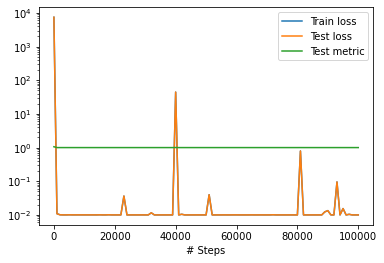

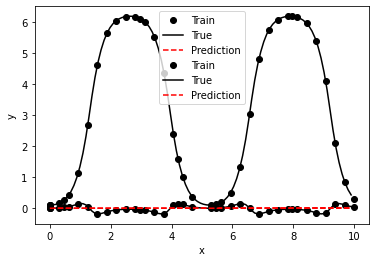

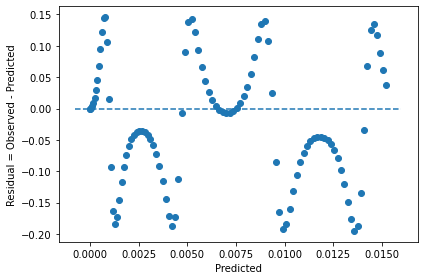

In [30]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde
from tensorflow import sin, cos
import numpy as np

# x = time y = output vom nn
def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    #y1 = x
    #y2 = theta
    # i soll abgeleitet werden nach j
    
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0) # x nach t
    dy1_xx = dde.grad.jacobian(y, x, i=1) # x_d nach t
    
    dy2_x = dde.grad.jacobian(y, x, i=1)
    dy2_xx = dde.grad.jacobian(dy2_x, x) # x_d nach t
    
    r_x_dd = dy1_xx - (m * (g * sin(y2) - l * dy2_x**2) * sin(y2)) / (M + m * sin(y2)**2) 
    r_theta_dd = dy2_xx - ((M*g+m*g-l*m*cos(y2)*dy2_x**2) * sin(y2) / l*(M+m*sin(y2)**2))
    return [r_x_dd, r_theta_dd]


def boundary(_, on_initial):
    return on_initial


def func(x):
    return np.hstack((x_f(x), theta_f(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.IC(geom, x_f, boundary, component=0)
ic2 = dde.IC(geom, theta_f, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "sigmoid"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Using backend: tensorflow.compat.v1



Instructions for updating:
non-resource variables are not supported in the long term




Compiling model...
Building feed-forward neural network...
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
'build' took 0.046928 s



/Users/lennartfuhrig/opt/anaconda3/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+37=37. 
  warnings.warn("The balance properties of Sobol' points require "


'compile' took 0.282321 s

Initializing variables...
Training model...

Step      Train loss                                  Test loss                                   Test metric   
0         [4.53e-01, 2.70e-01, 0.00e+00, 1.00e+00]    [4.65e-01, 2.74e-01, 0.00e+00, 1.00e+00]    [1.33e+00]    
1000      [8.04e-03, 6.89e-03, 9.17e-09, 2.86e-04]    [8.79e-03, 6.43e-03, 9.17e-09, 2.86e-04]    [7.49e-01]    
2000      [4.56e-03, 3.89e-03, 1.81e-06, 1.03e-04]    [4.63e-03, 3.82e-03, 1.81e-06, 1.03e-04]    [5.41e-01]    
3000      [1.93e-03, 2.75e-03, 1.18e-06, 4.01e-05]    [2.02e-03, 2.69e-03, 1.18e-06, 4.01e-05]    [3.66e-01]    
4000      [5.95e-04, 8.41e-04, 6.89e-07, 8.58e-06]    [6.53e-04, 7.21e-04, 6.89e-07, 8.58e-06]    [1.79e-01]    
5000      [2.49e-04, 3.39e-04, 2.14e-07, 2.27e-06]    [2.86e-04, 2.42e-04, 2.14e-07, 2.27e-06]    [9.93e-02]    
6000      [2.10e-04, 4.14e-04, 1.68e-05, 1.76e-04]    [2.02e-04, 3.61e-04, 1.68e-05, 1.76e-04]    [5.86e-02]    
7000      [1.36e-04, 1.0

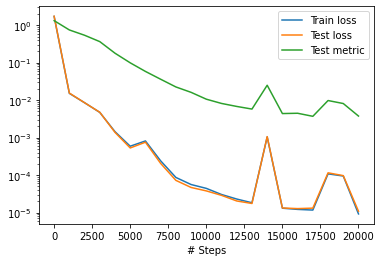

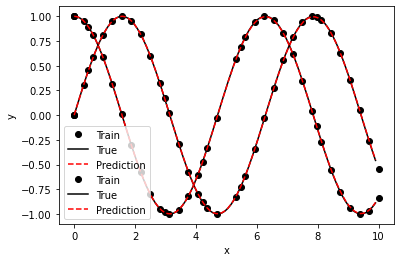

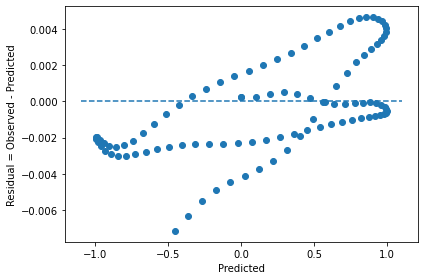

In [10]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde
import numpy as np

def ode_system(x, y):
    """ODE system.
    dy1/dx = y2
    dy2/dx = -y1
    """
    y1, y2 = y[:, 0:1], y[:, 1:]
    dy1_x = dde.grad.jacobian(y, x, i=0)
    dy2_x = dde.grad.jacobian(y, x, i=1)
    return [dy1_x - y2, dy2_x + y1]


def boundary(_, on_initial):
    return on_initial


def func(x):
    """
    y1 = sin(x)
    y2 = cos(x)
    """
    return np.hstack((np.sin(x), np.cos(x)))


geom = dde.geometry.TimeDomain(0, 10)
ic1 = dde.IC(geom, np.sin, boundary, component=0)
ic2 = dde.IC(geom, np.cos, boundary, component=1)
data = dde.data.PDE(geom, ode_system, [ic1, ic2], 35, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [2]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train(epochs=20000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

Compiling model...
Building feed-forward neural network...
'build' took 0.050083 s



/Users/lennartfuhrig/opt/anaconda3/lib/python3.8/site-packages/skopt/sampler/sobol.py:246: UserWarning: The balance properties of Sobol' points require n to be a power of 2. 0 points have been previously generated, then: n=0+66=66. 
  warnings.warn("The balance properties of Sobol' points require "


'compile' took 0.464983 s

Initializing variables...
Training model...

Step      Train loss              Test loss               Test metric   
0         [4.74e+01, 1.08e+00]    [4.84e+01, 1.08e+00]    [1.15e+00]    
1000      [6.70e+00, 5.63e-02]    [5.79e+00, 5.63e-02]    [1.69e+00]    
2000      [3.10e+00, 1.99e-04]    [2.06e+00, 1.99e-04]    [4.44e+00]    
3000      [5.63e-02, 9.42e-05]    [7.05e-02, 9.42e-05]    [4.40e-01]    
4000      [1.06e-03, 1.73e-06]    [7.70e-03, 1.73e-06]    [6.52e-02]    
5000      [6.68e-04, 8.19e-08]    [5.83e-03, 8.19e-08]    [4.55e-02]    
6000      [4.74e-04, 1.66e-08]    [4.15e-03, 1.66e-08]    [3.61e-02]    
7000      [1.12e-01, 1.27e-04]    [1.17e-01, 1.27e-04]    [5.64e-02]    
8000      [4.35e-04, 1.19e-07]    [2.00e-03, 1.19e-07]    [2.94e-02]    
9000      [1.60e-04, 2.06e-09]    [1.38e-03, 2.06e-09]    [1.97e-02]    
10000     [1.19e-04, 2.38e-10]    [9.72e-04, 2.38e-10]    [1.85e-02]    

Best model at step 10000:
  train loss: 1.19e-04
  

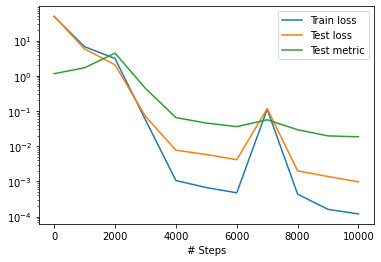

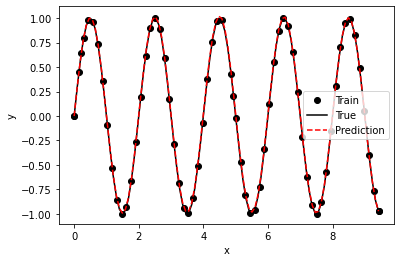

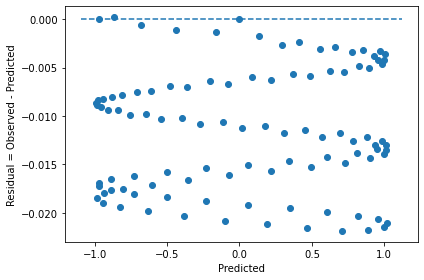

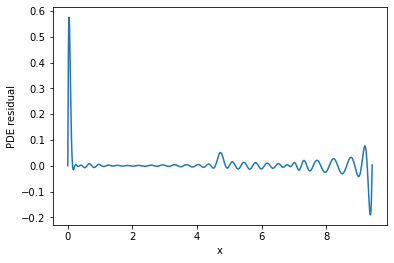

In [29]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch

Documentation: https://deepxde.readthedocs.io/en/latest/demos/poisson.1d.dirichlet.html
"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
import numpy as np
# Import torch if using backend pytorch
# import torch


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    # Use torch.sin for backend pytorch
    # return -dy_xx - np.pi ** 2 * torch.sin(np.pi * x)


def boundary(x, on_boundary):
    return on_boundary


def func(x):
    return np.sin(np.pi * x)


geom = dde.geometry.Interval(0, np.pi*3)
bc = dde.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 64, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.maps.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(epochs=10000)
# Optional: Save the model during training.
# checkpointer = dde.callbacks.ModelCheckpoint(
#     "model/model", verbose=1, save_better_only=True
# )
# Optional: Save the movie of the network solution during training.
# ImageMagick (https://imagemagick.org/) is required to generate the movie.
# movie = dde.callbacks.MovieDumper(
#     "model/movie", [-1], [1], period=100, save_spectrum=True, y_reference=func
# )
# losshistory, train_state = model.train(epochs=10000, callbacks=[checkpointer, movie])

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

# Optional: Restore the saved model with the smallest training loss
# model.restore(f"model/model-{train_state.best_step}.ckpt", verbose=1)
# Plot PDE residual
x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()